# Feature Selection via LASSO

In [22]:
# Initialize packages
library(glmnet)
library(lars)

Loaded lars 1.2



In [222]:
# Import data
data = read.csv('combined_listing_cleaned.csv',header=TRUE,na.strings=c("","NA"))
data$price = as.numeric(data$price)

drops = c("weekly_price", "square_feet", "monthly_price", "is_business_travel_ready")
data = data[, !(names(data) %in% drops)]

data.complete = data[complete.cases(data),]
data.complete$price = as.numeric(data.complete$price)
data.complete1 = data.matrix(data.complete)

In [223]:
str(data.complete)

factorvars = colnames(data.complete[,sapply(data.complete, is.factor)])
factorvars

'data.frame':	89996 obs. of  41 variables:
 $ accommodates                    : int  6 4 8 8 2 4 2 3 2 6 ...
 $ availability_30                 : int  0 0 8 0 9 0 9 0 0 21 ...
 $ availability_365                : int  224 72 212 9 344 17 333 6 137 273 ...
 $ availability_60                 : int  1 0 38 0 39 17 31 0 0 33 ...
 $ availability_90                 : int  1 0 68 0 69 17 58 4 12 44 ...
 $ bathrooms                       : num  2 1 1 3 1 1 1 1 1 1 ...
 $ bedrooms                        : int  2 2 3 4 1 2 1 2 1 2 ...
 $ beds                            : int  4 3 4 4 1 2 1 2 1 3 ...
 $ calculated_host_listings_count  : int  27 1 9 1 1 1 3 1 2 1 ...
 $ last_review                     : Factor w/ 1508 levels "2010-02-25","2011-07-04",..: 890 1436 1245 1288 702 1468 1474 1454 1466 1451 ...
 $ cancellation_policy             : Factor w/ 6 levels "flexible","moderate",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ cleaning_fee                    : int  195 0 0 95 10 0 15 50 25 80 ...
 $ extra_people

[1] "last_review"                      "cancellation_policy"             
 [3] "host_has_profile_pic"             "host_identity_verified"          
 [5] "host_is_superhost"                "instant_bookable"                
 [7] "is_location_exact"                "property_type"                   
 [9] "require_guest_phone_verification" "require_guest_profile_picture"   
[11] "requires_license"                 "room_type"

In [153]:
# 1st attempt at LASSO

y <- as.vector(data.complete$price)
xfactors = model.matrix(price ~ cancellation_policy + host_has_profile_pic + host_identity_verified
                           + host_is_superhost + instant_bookable + is_location_exact
                           + property_type + require_guest_phone_verification
                           + require_guest_profile_picture + requires_license
                           + room_type, data = data.complete)[,-1]
newdf = data.complete[, !(names(data.complete) %in% factorvars)]
ncol(xfactors)
ncol(newdf)
x = cbind(newdf, xfactors)
ncol(x)
x = data.frame(matrix(unlist(x), nrow = nrow(x), byrow = F))
xm = data.matrix(x)
c(ncol(xm), nrow(xm))
# alpha = 1 - LASSO
lambdas <- exp( seq(-3, 10, length=50))
a <- glmnet(x=xm, y=y, lambda=rev(lambdas), 
            family='gaussian', alpha=1, intercept=TRUE)

[1] 54

[1] 29

[1] 83

[1]    83 89996

In [200]:
# 2nd attempt at LASSO (w/ continuous variables only)

removevars = c(factorvars, "price", "latitude", "longitude")

y <- as.vector(data.complete$price)
x = data.complete[, !(names(data.complete) %in% removevars)]
# x = data.frame(matrix(unlist(x), nrow = nrow(x), byrow = T))
# x = as.data.frame(x)
xm = as.matrix(x)
# alpha = 1 - LASSO
lambdas <- exp( seq(-3, 10, length=50))
a <- glmnet(x=xm, y=y, lambda=rev(lambdas), 
            family='gaussian', alpha=1, intercept=TRUE)

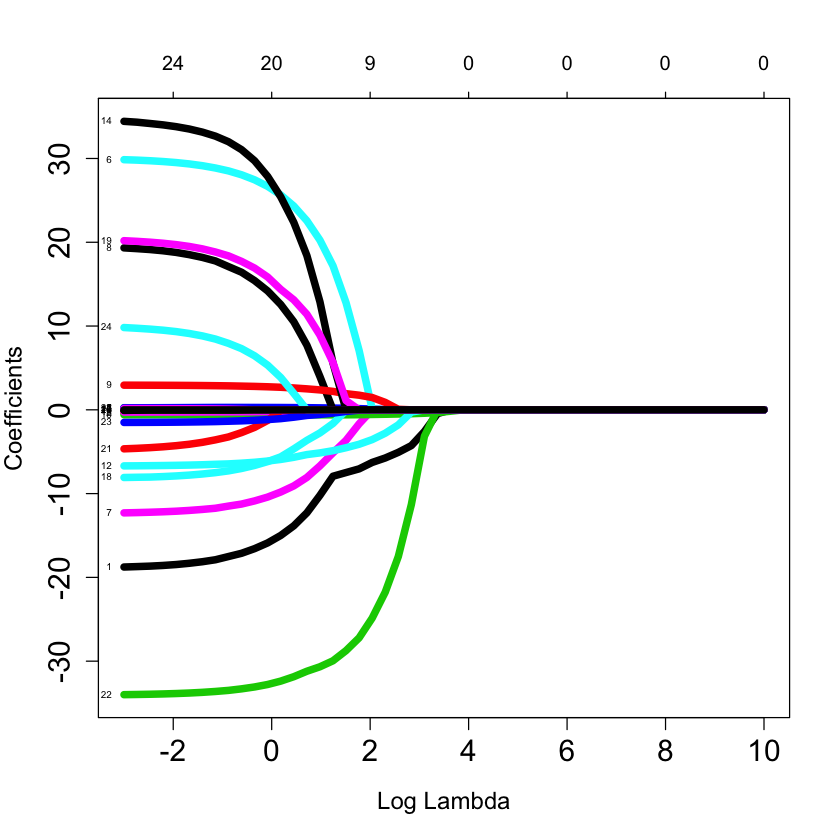

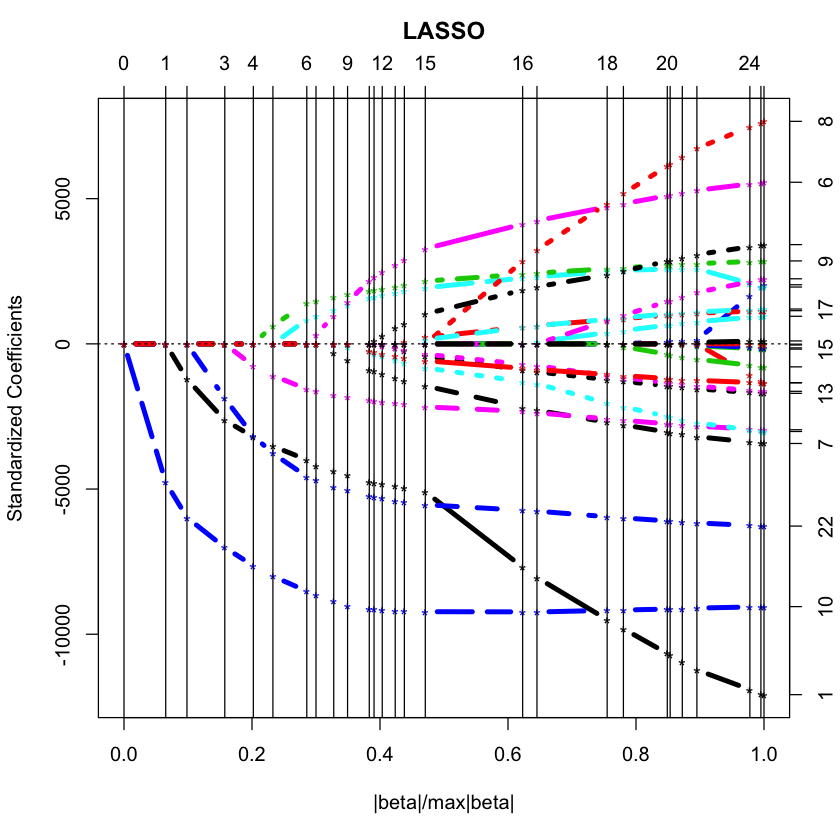

In [201]:
plot(a, xvar='lambda', label=TRUE, lwd=6, cex.axis=1.5, cex.lab=1.2)
b = lars(x=xm, y=y, type="lasso", intercept=TRUE)
plot(b, lwd = 4)

In [212]:
# rev(b$entry)

# coef(b)[,10]

In [211]:
# head(xm)
# c(ncol(xm), nrow(xm))

# data.frame((1:26), colnames(xm))

# ARIMAX Models

In [219]:
# ARIMAX(2,1,2)(1,0,1)[52]

selectfeatures = c("date", "price", "latitude", "longitude", "cleaning_fee", "review_scores_communication",
                      "review_scores_accuracy", "calculated_host_listings_count", "availability_365",
                      "review_scores_checkin", "reviews_per_month", "extra_people", "guests_included",
                      "maximum_nights")
selectfeatures

df.arimax = data[, names(data) %in% selectfeatures]

str(df.arimax)





# weekly_ts <- apply.weekly(daily_xts,mean)

# n = nrow(df.arimax)
# ntrain = n*.85
# ntest = n-ntrain

# vtrain = df.arimax[1:ntrain,]
# vtest = 


[1] "date"                           "price"                         
 [3] "latitude"                       "longitude"                     
 [5] "cleaning_fee"                   "review_scores_communication"   
 [7] "review_scores_accuracy"         "calculated_host_listings_count"
 [9] "availability_365"               "review_scores_checkin"         
[11] "reviews_per_month"              "extra_people"                  
[13] "guests_included"                "maximum_nights"

'data.frame':	200235 obs. of  13 variables:
 $ availability_365              : int  224 365 248 7 192 354 72 212 9 7 ...
 $ calculated_host_listings_count: int  27 1 1 1 3 1 1 9 1 1 ...
 $ cleaning_fee                  : num  195 NA 40 60 60 NA 0 0 95 40 ...
 $ extra_people                  : num  0 0 0 15 25 0 0 54 0 0 ...
 $ guests_included               : int  1 1 2 2 2 1 1 2 1 1 ...
 $ latitude                      : num  49.3 49.3 49.2 49.2 49.3 ...
 $ longitude                     : num  -123 -123 -123 -123 -123 ...
 $ maximum_nights                : int  1124 364 1125 60 365 365 31 1125 29 60 ...
 $ price                         : num  367 714 134 175 123 175 284 33 167 985 ...
 $ review_scores_accuracy        : int  9 9 10 10 10 9 9 8 10 10 ...
 $ review_scores_checkin         : int  10 10 10 10 10 9 10 8 10 10 ...
 $ review_scores_communication   : int  9 10 10 9 9 10 10 9 10 10 ...
 $ reviews_per_month             : num  0.19 0.67 1.45 0.32 2.33 0.3 1.32 0.31 0.06 2.22 ...
